# PythonとPOV-Ray



---


# povrayの準備

0. povrayをaptコマンドでインストールします。

In [1]:
!apt install povray

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libsdl1.2debian povray-includes
Suggested packages:
  povray-doc povray-examples
The following NEW packages will be installed:
  libsdl1.2debian povray povray-includes
0 upgraded, 3 newly installed, 0 to remove and 12 not upgraded.
Need to get 1,723 kB of archives.
After this operation, 5,791 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libsdl1.2debian amd64 1.2.15+dfsg2-0.1ubuntu0.2 [175 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 povray amd64 1:3.7.0.4-2 [1,284 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 povray-includes all 1:3.7.0.4-2 [264 kB]
Fetched 1,723 kB in 1s (1,793 kB/s)
Selecting previously 



---
# 例１


1. Pythonのコードを作成します。
    - 'sample.pov'というファイルを出力するコードです。
    - write により、POV-Rayのコマンドをファイルに書き出します。
    - write で pov ファイルを作成しただけの原始的なコードです。

In [2]:
path = 'sample.pov'

with open(path, mode='w') as f:
    f.write('#version 3.7;\n')
    f.write('global_settings { assumed_gamma 2.2 }\n')
    f.write('\n')
    f.write('camera{\n') 
    f.write('  location <0.0, 0.0, -10.0>\n')
    f.write('  look_at  <0.0, 0.0, 0.0>\n')
    f.write('}\n')
    f.write('\n')
    f.write('light_source {\n') 
    f.write('  <5.0,5.0,-5.0>\n') 
    f.write('  color rgb <1.0, 1.0, 1.0>*2\n')
    f.write('}\n')
    f.write('\n')
    f.write('sphere {\n') 
    f.write('  <0.0, 0.0 ,0.0>, 3.0\n')  
    f.write('  pigment { rgb <0.0, 1.0, 0.0> }\n')
    f.write('}\n')

2. 出力した 'sample.pov' ファイルを表示します。

In [3]:
!cat sample.pov

#version 3.7;
global_settings { assumed_gamma 2.2 }

camera{
  location <0.0, 0.0, -10.0>
  look_at  <0.0, 0.0, 0.0>
}

light_source {
  <5.0,5.0,-5.0>
  color rgb <1.0, 1.0, 1.0>*2
}

sphere {
  <0.0, 0.0 ,0.0>, 3.0
  pigment { rgb <0.0, 1.0, 0.0> }
}


3. povrayで 'sample.pov' から 'sample.png'の画像を生成します。

In [4]:
!povray sample.pov &> /dev/null

4. Pythonのコード（OpenCVとMatplotlib利用）で画像 'sample.png' を表示します。 
    - 本来ならファイルの有無などのチェックが必要ですが省略しています。

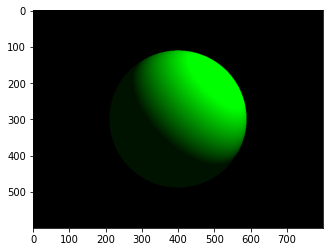

In [5]:
import cv2
import matplotlib.pyplot as plt

def pshow(filename):
    im = cv2.imread(filename)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.show()


pshow('sample.png')

- 実験
    - 球の大きさ変えてみましょう。
    - 球の色を変えてみましょう。
    - 球の位置を変更してみましょう。



---


# 例２

1. Pythonのコードを作成します。
    - 'sample2.pov'というファイルを出力します。
    - 1000個の球(sphere)を３次元空間に配置します。
    - 球の３次元座標は、乱数 x,y,z で決定します。
    - この例では、writeを多用していますが、もっと良いコード書き換え可能です。

In [6]:
import random

path = 'sample2.pov'

with open(path, mode='w') as f:
    f.write('#version 3.7;\n')
    f.write('global_settings { assumed_gamma 2.2 }\n')
    f.write('\n')
    f.write('\n')
    f.write('#include "colors.inc"\n')  
    f.write('#include "skies.inc"\n')  

    f.write('camera{\n') 
    f.write('  location <0.0, 0.0, -1.1>\n')
    f.write('  look_at  <0.0, 0.0, 0.0>\n')
    f.write('}\n')
    f.write('\n')
    f.write('light_source {\n') 
    f.write('  <5.0,5.0,-5.0>\n') 
    f.write('  color rgb <1.0, 1.0, 1.0> * 1.50 \n')
    f.write('}\n')
    f.write('\n')
    f.write('sky_sphere {\n')
    f.write('  S_Cloud1\n')
    f.write('}\n')

    f.write('plane {\n')
    f.write('  y, -1\n')
    f.write('  pigment { color rgb <0.7,0.5,0.3> }\n')
    f.write('}\n')
    f.write('\n')

    for i in range(1000):
        r = 0.02
        x = random.random() - 0.500
        y = random.random() - 0.500 
        z = random.random() - 0.500
        coord = f'  <{x},{y},{z}>, {r}\n'
        # print(coord)

        f.write('sphere {\n') 
        f.write(coord)
        f.write('  pigment { rgb <0.0, 1.0, 0.0> }\n')
        f.write('}\n')

2. 生成された 'sample2.pov' の情報を表示します。
    - 行数を表示します。
    - head 部分を表示します。
    - tail 部分を表示します。

In [7]:
!wc -l sample2.pov
!echo '---------'
!head sample2.pov
!echo '---------'
!tail sample2.pov

4024 sample2.pov
---------
#version 3.7;
global_settings { assumed_gamma 2.2 }


#include "colors.inc"
#include "skies.inc"
camera{
  location <0.0, 0.0, -1.1>
  look_at  <0.0, 0.0, 0.0>
}
---------
  pigment { rgb <0.0, 1.0, 0.0> }
}
sphere {
  <-0.15433849987932813,-0.4981837959377635,-0.02421727623214498>, 0.02
  pigment { rgb <0.0, 1.0, 0.0> }
}
sphere {
  <0.17645191531139015,0.14289271444263252,-0.0006824123647564129>, 0.02
  pigment { rgb <0.0, 1.0, 0.0> }
}


3. povrayで 'sample.pov' から 'sample.png'の画像を生成します。
    - 画像のサイズは、縦480x横640です。
    - +Q11で高画質を指定しています。
    - +AはAnti-aliasです。
    - '&> /dev/null' で標準出力と標準エラーのメッセージを消しています。

In [8]:
!povray sample2.pov +Q11 +A +H480 +W640 &> /dev/null

4. Pythonのコード（OpenCVとMatplotlib利用）で画像 'sample2.png' を表示します。

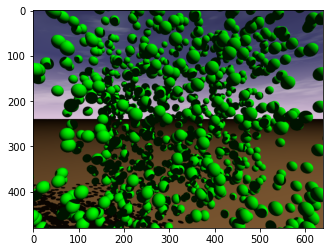

In [9]:
import cv2
import matplotlib.pyplot as plt

def pshow(filename):
    im = cv2.imread(filename)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.show()


pshow('sample2.png')

- 実験
    - 球の数を変えてみましょう。
    - 球の大きさや色を変えてみましょう。
    - 球が表示される３次元位置を変更してみましょう。
    - Google Colabの左のメニュー「ファイル」で画像をダウンロードしてみましょう。



---


# 例３

1. Pythonのコードを作成します。
    - 'sample3.pov'というファイルを出力するコードです。
    - write命令により、POV-Rayのコマンドをファイルに書き出します。
    - 様々な石のテクスチャの球を３次元空間に配置します。

In [10]:
import random

path = 'sample3.pov'

with open(path, mode='w') as f:
    f.write('#version 3.7;\n')
    f.write('global_settings { assumed_gamma 2.2 }\n')
    f.write('\n')
    f.write('\n')
    f.write('#include "colors.inc"\n')  
    f.write('#include "skies.inc"\n')  
    f.write('#include "stones.inc"\n')  

    f.write('camera{\n') 
    f.write('  location <0.0, 0.0, -1.1>\n')
    f.write('  look_at  <0.0, 0.0, 0.0>\n')
    f.write('}\n')
    f.write('\n')
    f.write('light_source {\n') 
    f.write('  <0.0,2.0,-5.0>\n') 
    f.write('  color rgb <1.0, 1.0, 1.0> * 2.00 \n')
    f.write('}\n')
    f.write('\n')
    f.write('sky_sphere {\n')
    f.write('  S_Cloud2\n')
    f.write('}\n')

    f.write('plane {\n')
    f.write('  y, -1\n')
    f.write('  pigment { color rgb <0.7,0.5,0.3> }\n')
    f.write('}\n')
    f.write('\n')

    db = []
    for i in range(1,45):
        st = f'T_Stone{i}'
        db.append(st)

    for i in range(500):
        r = 0.01
        x = random.random() - 0.500
        y = random.random() * 0.500 - 0.2500 
        z = random.random() - 0.500
        coords = f'  <{x},{y},{z}>, {r}\n'

        tex = random.choice(db)
        textures = '  texture {' + tex + '}\n'
        print( tex, end=' ' )

        f.write('sphere {\n') 
        f.write(coords)
        f.write(textures)
        f.write('}\n')

T_Stone33 T_Stone5 T_Stone21 T_Stone31 T_Stone6 T_Stone9 T_Stone23 T_Stone21 T_Stone15 T_Stone28 T_Stone12 T_Stone39 T_Stone8 T_Stone35 T_Stone5 T_Stone28 T_Stone13 T_Stone32 T_Stone20 T_Stone4 T_Stone20 T_Stone40 T_Stone10 T_Stone32 T_Stone31 T_Stone20 T_Stone15 T_Stone32 T_Stone14 T_Stone23 T_Stone9 T_Stone15 T_Stone10 T_Stone44 T_Stone17 T_Stone4 T_Stone31 T_Stone11 T_Stone20 T_Stone26 T_Stone1 T_Stone24 T_Stone42 T_Stone12 T_Stone32 T_Stone2 T_Stone25 T_Stone2 T_Stone11 T_Stone41 T_Stone29 T_Stone33 T_Stone18 T_Stone22 T_Stone16 T_Stone21 T_Stone21 T_Stone26 T_Stone9 T_Stone3 T_Stone2 T_Stone37 T_Stone42 T_Stone27 T_Stone3 T_Stone44 T_Stone36 T_Stone43 T_Stone40 T_Stone1 T_Stone7 T_Stone34 T_Stone17 T_Stone38 T_Stone3 T_Stone42 T_Stone18 T_Stone31 T_Stone9 T_Stone23 T_Stone29 T_Stone6 T_Stone33 T_Stone2 T_Stone10 T_Stone16 T_Stone7 T_Stone23 T_Stone15 T_Stone18 T_Stone37 T_Stone37 T_Stone23 T_Stone42 T_Stone39 T_Stone15 T_Stone29 T_Stone43 T_Stone43 T_Stone29 T_Stone36 T_Stone38 T_

In [11]:
!wc -l sample3.pov
!echo '---------'
!head sample3.pov
!echo '---------'
!tail sample3.pov

2025 sample3.pov
---------
#version 3.7;
global_settings { assumed_gamma 2.2 }


#include "colors.inc"
#include "skies.inc"
#include "stones.inc"
camera{
  location <0.0, 0.0, -1.1>
  look_at  <0.0, 0.0, 0.0>
---------
  texture {T_Stone2}
}
sphere {
  <0.4409087180610465,0.196667136902841,0.11772406721686524>, 0.01
  texture {T_Stone14}
}
sphere {
  <0.1932112471509453,-0.08582040647244238,0.15824317747961625>, 0.01
  texture {T_Stone8}
}


In [12]:
!povray sample3.pov +Q11 +A +H1200 +W1600 &> /dev/null

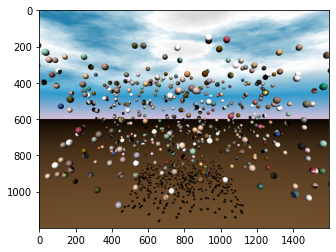

In [13]:
pshow('sample3.png')

- 実験
    - 球の数を変えてみましょう。
    - 球の大きさをランダムにしてみましょう。
    - T_StoneをT_Woodsに変更して、石から木のテクスチャにしましょう。
        - include "woods.inc"
        - T_Woods
        - T_Wood1 ～ T_Wood35  'range(1,36)'



---
# 応用例
- Pythonのコードでデータファイル（エクセルやCSVなど）を読んで、POV-Rayのコードとして出力すれば、データを３次元の様々な視点から可視化することが可能です。
- また、Pythonの様々なモジュールを利用し、科学計算やシミュレーションの結果をPOV-Rayのファイルで出力すれば、レイトレーシングによる綺麗な画像として可視化することができます。




---


# 付録：色や材質のリスト
## 色、テクスチャ、石、木、金属
- colors.inc http://compsci.world.coocan.jp/OUJ/povtl/colors/index.html
- textures.inc http://compsci.world.coocan.jp/OUJ/povtl/textures/index.html
- stones.inc http://compsci.world.coocan.jp/OUJ/povtl/stones/index.html
- woods.inc http://compsci.world.coocan.jp/OUJ/povtl/woods/index.html
- metals.inc http://compsci.world.coocan.jp/OUJ/povtl/metals/index.html

## ガラス、旧ガラス
- glass.inc (gcff) http://compsci.world.coocan.jp/OUJ/povml/gcff/index.html
- glass.inc (gcwt) http://compsci.world.coocan.jp/OUJ/povml/gcwt/index.html



---


- 10/2022